In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as PercentFormatter

In [ ]:
data = pd.read_excel('rfm_analysis.xlsx')

In [ ]:
# df = pd.read_csv("https://docs.google.com/spreadsheets/d/1ncs-ATJgax-SZFvElr1Erz9d7nBK1DQI3VIqX88MvcE/edit#gid=1618589654", "rfm_analysis", sep=";")
data.head(5)

,customer_id,first_name,last_name,transaction_date,past_3_years_bike_related_purchases,list_price,state,age_group
0,1,Laraine,Medendorp,2017-01-05,93,360.40,NSW,60 - 69
1,1,Laraine,Medendorp,2017-12-23,93,235.63,NSW,60 - 69
2,1,Laraine,Medendorp,2017-05-11,93,1720.70,NSW,60 - 69
3,1,Laraine,Medendorp,2017-04-06,93,1577.53,NSW,60 - 69
4,1,Laraine,Medendorp,2017-06-04,93,642.70,NSW,60 - 69


In [ ]:
print(data['transaction_date'].min(), data['transaction_date'].max())

2017-01-01 00:00:00 2017-12-30 00:00:00


In [ ]:
last_day = dt.datetime(2017, 12, 30)
data['hist']=last_day - data['transaction_date']
data['hist'].astype('timedelta64[D]')
data['hist']=data['hist'] / np.timedelta64(1, 'D')
data.head()

,customer_id,first_name,last_name,transaction_date,past_3_years_bike_related_purchases,list_price,state,age_group,hist
0,1,Laraine,Medendorp,2017-01-05,93,360.40,NSW,60 - 69,359.0
1,1,Laraine,Medendorp,2017-12-23,93,235.63,NSW,60 - 69,7.0
2,1,Laraine,Medendorp,2017-05-11,93,1720.70,NSW,60 - 69,233.0
3,1,Laraine,Medendorp,2017-04-06,93,1577.53,NSW,60 - 69,268.0
4,1,Laraine,Medendorp,2017-06-04,93,642.70,NSW,60 - 69,209.0


In [ ]:
data.drop(columns=['past_3_years_bike_related_purchases'], axis=1, inplace= True)
data.head()

,customer_id,first_name,last_name,transaction_date,list_price,state,age_group,hist
0,1,Laraine,Medendorp,2017-01-05,360.40,NSW,60 - 69,359.0
1,1,Laraine,Medendorp,2017-12-23,235.63,NSW,60 - 69,7.0
2,1,Laraine,Medendorp,2017-05-11,1720.70,NSW,60 - 69,233.0
3,1,Laraine,Medendorp,2017-04-06,1577.53,NSW,60 - 69,268.0
4,1,Laraine,Medendorp,2017-06-04,642.70,NSW,60 - 69,209.0


In [ ]:
rfmTable = data.groupby('customer_id').agg({'hist': lambda x:x.min(), # Recency
                                        'customer_id': lambda x: len(x),               # Frequency
                                        'list_price': lambda x: x.sum()})          # Monetary Value

rfmTable.rename(columns={'hist': 'recency', 
                         'customer_id': 'frequency', 
                         'list_price': 'monetary_value'}, inplace=True)

In [ ]:
rfmTable.head(5)

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,9084.45
2,128.0,3,4149.07
4,195.0,2,1047.72
5,16.0,6,5903.20
6,64.0,5,5931.69


In [ ]:
data[data['customer_id']==1]

,customer_id,first_name,last_name,transaction_date,list_price,state,age_group,hist
0,1,Laraine,Medendorp,2017-01-05,360.40,NSW,60 - 69,359.0
1,1,Laraine,Medendorp,2017-12-23,235.63,NSW,60 - 69,7.0
2,1,Laraine,Medendorp,2017-05-11,1720.70,NSW,60 - 69,233.0
3,1,Laraine,Medendorp,2017-04-06,1577.53,NSW,60 - 69,268.0
4,1,Laraine,Medendorp,2017-06-04,642.70,NSW,60 - 69,209.0
5,1,Laraine,Medendorp,2017-02-21,71.49,NSW,60 - 69,312.0
6,1,Laraine,Medendorp,2017-03-27,688.63,NSW,60 - 69,278.0
7,1,Laraine,Medendorp,2017-12-09,742.54,NSW,60 - 69,21.0
8,1,Laraine,Medendorp,2017-03-29,1274.93,NSW,60 - 69,276.0
9,1,Laraine,Medendorp,2017-05-19,1538.99,NSW,60 - 69,225.0


In [ ]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.25     17.0        4.0        4160.805
0.50     44.0        6.0        5971.350
0.75     86.0        7.0        8155.145 <class 'pandas.core.frame.DataFrame'>


In [ ]:
quartiles=quartiles.to_dict()
quartiles

{'frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 7.0},
 'monetary_value': {0.25: 4160.805, 0.5: 5971.35, 0.75: 8155.1449999999995},
 'recency': {0.25: 17.0, 0.5: 44.0, 0.75: 86.0}}

In [ ]:
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1    

In [ ]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [ ]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [ ]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
1,7.0,11,9084.45,1,1,1,111
2,128.0,3,4149.07,4,4,4,444
4,195.0,2,1047.72,4,4,4,444
5,16.0,6,5903.20,1,3,3,133
6,64.0,5,5931.69,3,3,3,333


In [ ]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
2183,8.0,14,19071.32,1,1,1,111
1140,6.0,13,16199.24,1,1,1,111
729,1.0,10,15826.00,1,1,1,111
1317,10.0,9,15370.81,1,1,1,111
322,1.0,12,14782.23,1,1,1,111
...,...,...,...,...,...,...,...
751,130.0,2,386.48,4,4,4,444
301,93.0,2,361.78,4,4,4,444
872,171.0,1,290.62,4,4,4,444


In [ ]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
111    10954.174619
112     7456.503000
113     5441.725000
121     9424.633400
122     7116.580000
123     5295.010476
124     3783.446667
131     8958.452800
132     6914.302969
133     5120.192844
134     3519.417083
142     6517.603529
143     4947.409452
144     2965.335526
211    11080.027732
212     7297.588095
213     5424.593333
221     9298.371489
222     7331.085000
223     5316.340455
224     3409.320000
231     8910.935926
232     6800.333063
233     5129.812258
234     3522.502353
242     6381.861250
243     4927.653000
244     2872.308889
311    10335.372748
312     7155.638333
313     5536.313333
321     9387.865806
322     7265.339608
323     5474.130000
324     3474.410000
331     8822.772069
332     6766.963120
333     5142.497851
334     3461.767419
342     6310.504000
343     4810.626533
344     2883.480395
411    10436.750811
412     7327.811667
413     5375.360000
421     9140.082593
422     7042.514167
423     5251.707143
424     3458.830000
431     883

In [ ]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3487 entries, 1 to 3500
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         3487 non-null   float64
 1   frequency       3487 non-null   int64  
 2   monetary_value  3487 non-null   float64
 3   R_Quartile      3487 non-null   int64  
 4   F_Quartile      3487 non-null   int64  
 5   M_Quartile      3487 non-null   int64  
 6   RFMClass        3487 non-null   object 
 7   Total Score     3487 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 245.2+ KB
             recency  frequency  monetary_value  R_Quartile  F_Quartile  \
customer_id                                                               
1                7.0         11         9084.45           1           1   
2              128.0          3         4149.07           4           4   
4              195.0          2         1047.72           4           4   
5    

In [ ]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     10954.174619
4     10278.229472
5      8937.407000
6      7797.046990
7      6587.928906
8      5902.535486
9      4947.573216
10     4174.975444
11     3682.173706
12     2511.282456
Name: monetary_value, dtype: float64

In [ ]:
rfmSeg.groupby('Total Score').agg('frequency').mean()

Total Score
3     9.409524
4     8.820423
5     8.000000
6     6.756545
7     5.960938
8     5.365741
9     4.624742
10    4.068768
11    3.463259
12    2.618343
Name: frequency, dtype: float64

In [ ]:
rfmSeg.groupby('Total Score').agg('recency').mean()

Total Score
3       7.609524
4      23.070423
5      38.493548
6      37.620419
7      39.515625
8      49.469907
9      61.432990
10     74.805158
11     99.763578
12    163.677515
Name: recency, dtype: float64

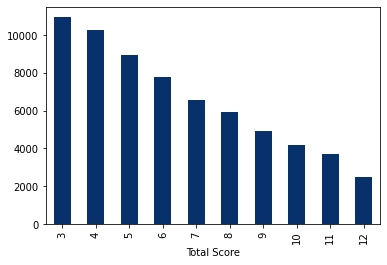

In [ ]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

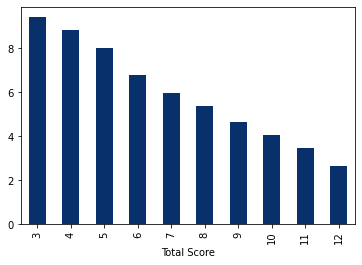

In [ ]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

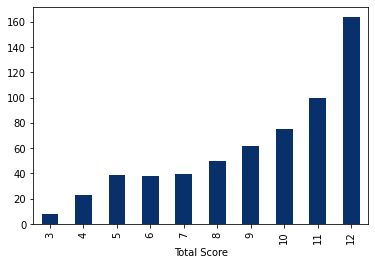

In [ ]:
rfmSeg.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

In [ ]:
rfmSeg[rfmSeg['Total Score']==3]

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
customer_id,,,,,,,,
1,7.0,11,9084.45,1,1,1,111,3
25,5.0,12,9996.33,1,1,1,111,3
37,7.0,9,11291.71,1,1,1,111,3
89,4.0,9,12741.44,1,1,1,111,3
99,2.0,9,8279.06,1,1,1,111,3
...,...,...,...,...,...,...,...,...
3402,12.0,9,10700.79,1,1,1,111,3
3420,5.0,11,13885.45,1,1,1,111,3
3427,1.0,8,12523.17,1,1,1,111,3
